In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Import API key
from api_keys import geoapify_key

In [2]:

full_data_df = pd.read_csv("Resources/full_data_tp_df")

# Display sample data
full_data_df.head()

,Name,Review Count,Average Rating,Latitude,Longitude
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.16497
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.96054
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.88786
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.17975
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.41113


In [3]:
%%capture --no-display

# Configure the map plot
map_plot_1 = full_data_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    frame_width = 600,
    frame_height = 500,
    size = "Review Count",
    color = "Average Rating")

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Average Rating,Review Count)

In [4]:
full_data_positive_df = full_data_df.loc[(full_data_df['Average Rating']<6)& (full_data_df['Average Rating']>0)]


    
# Drop any rows with null values

#save dataframe


# Display sample data
full_data_positive_df

,Name,Review Count,Average Rating,Latitude,Longitude
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130
...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110
95,Quails Trail B&B,3,3.5,50.054382,-119.415480
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060


In [5]:
full_data_positive_df.to_csv("full_data_positive", index=False)

In [6]:
%%capture --no-display

# Configure the map plot
map_plot_2 = full_data_positive_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    frame_width = 600,
    frame_height = 500,
    size = "Review Count",
    color = "Average Rating")

# Display the map
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Average Rating,Review Count)

the r value is: 0.017571429248363128


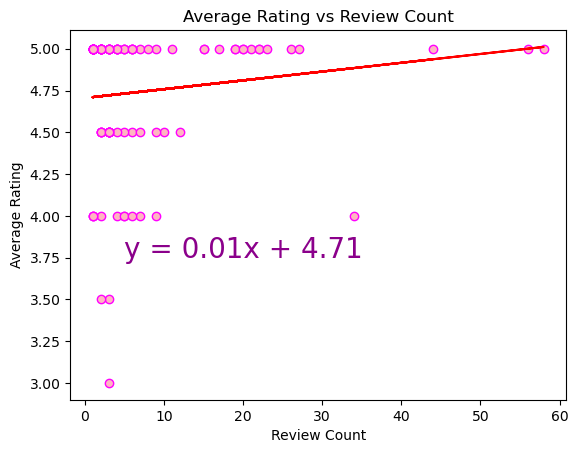

In [8]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

x = full_data_positive_df['Review Count'].astype("float")
y = full_data_positive_df['Average Rating'].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, marker = "o", facecolors ="lightpink", edgecolors="magenta")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (5,3.75), fontsize=20, color="darkmagenta")


plt.title("Average Rating vs Review Count")
plt.xlabel('Review Count')
plt.ylabel('Average Rating')


print(f"the r value is: {rvalue**2}")


plt.show()

In [9]:
#want to look at entertainment spots near rentals
entertainment_data_df = full_data_positive_df

entertainment_data_df

,Name,Review Count,Average Rating,Latitude,Longitude
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130
...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110
95,Quails Trail B&B,3,3.5,50.054382,-119.415480
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060


In [10]:
entertainment_data_df["# of entertainment spots"] = ""

entertainment_data_df

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\341138260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entertainment_data_df["# of entertainment spots"] = ""


,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,
...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,


In [11]:
import requests
import pandas as pd

# Define your DataFrame (assuming you have one)
entertainment_data_df

# Initialize an empty list to store results
entertainment_counts = []

# Set base URL for Geoapify API
base_url = "https://api.geoapify.com/v2/places"

# Iterate through the DataFrame
for index, row in entertainment_data_df.iterrows():
    # Get latitude, longitude, and name from the DataFrame
    latitude = row["Latitude"]
    longitude = row["Longitude"]
    name = row["Name"]

    # Set up parameters for the API request
    limit = 20
    radius = 5000
    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params = {
        "filter": filters,
        "limit": limit,
        "bias": bias,
        "apiKey": geoapify_key,  # Make sure geoapify_key is defined
        "categories": "entertainment"
    }

    # Make the API request
    entertainment_response = requests.get(base_url, params=params)

    # Check if the response status code is successful (e.g., 200)
    if entertainment_response.status_code == 200:
        entertainment_data = entertainment_response.json()
        
        # Extract the relevant information from the JSON response
        try:
            count = len(entertainment_data["features"])
        except KeyError:
            count = 0  # If no entertainment spots found
        
        # Append the result to the list
        entertainment_counts.append(count)
        
        # Log the search results including the name
        print(f"Location: {latitude}, {longitude} ({name}) - Entertainment spots: {count}")
    else:
        print(f"Failed to fetch data for location: {latitude}, {longitude} ({name})")

# Add the list of counts to the DataFrame
entertainment_data_df["# of entertainment spots"] = entertainment_counts

# Display sample data with counts
print(entertainment_data_df)


Location: 50.32235, -119.16497 (The Gate House Cottage at Castle on the Mountain) - Entertainment spots: 0
Location: 49.23602, -122.96054 (AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR DEER LAKE) - Entertainment spots: 19
Location: 49.113632, -125.88786 (Cedar Shack Cottage with private Hot Tub - Steps to Chesterman Beach) - Entertainment spots: 3
Location: 54.178745, -130.17975 (Cassiar Cannery ~ where history and nature meet~) - Entertainment spots: 0
Location: 48.60293, -123.41113 (2 bedroom suite located between Victoria & Sidney) - Entertainment spots: 4
Location: 48.42096, -123.36286 ( Luxury downtown condo, steps to Inner Harbor!!! ) - Entertainment spots: 20
Location: 49.79765, -119.70941 (Mini Resort mins to beach and downtown Peachland) - Entertainment spots: 1
Location: 49.544155, -124.86569 (Waterfront suite--kit, balcony--12-acre hobbyfarm) - Entertainment spots: 4
Location: 53.47473, -127.272125 (Coles Lake Lodge- Fly In-Remote Wilderness Getaway) - Entertainment spots: 0


Location: 50.117386, -119.51292 (Beautiful cottage at Lacasa Lakeside Resort) - Entertainment spots: 0
Location: 48.943172, -125.54621 (Black Rock Landing 302) - Entertainment spots: 1
Location: 49.02512, -119.44128 (Lakeside Oasis Osoyoos, Sleeps 6, Casa Del Mila Oro) - Entertainment spots: 9
Location: 49.28498, -123.117935 (Private Le Soleil Suite) - Entertainment spots: 20
Location: 50.12359, -119.44643 (Okanagan Lakeview B & B) - Entertainment spots: 0
Location: 48.901455, -123.54948 (Magic Lamp Cabin on St. Mary Lake) - Entertainment spots: 2
Location: 48.39454, -123.618645 (Lilac House Country B & B - The Suite of Angels) - Entertainment spots: 0
Location: 50.049892, -119.49975 (Lakefront Cottage on Okanagan Lake with boat dock) - Entertainment spots: 0
Location: 49.46666, -123.78702 (Starfish Retreat) - Entertainment spots: 2
Location: 49.638344, -124.044395 (pauls cottage cross the street from the lake) - Entertainment spots: 0
Location: 49.122044, -125.89202 (The Dunes House a

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\2206630354.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entertainment_data_df["# of entertainment spots"] = entertainment_counts


In [12]:
import requests
import pandas as pd

# Define your DataFrame (assuming you have one)
entertainment_data_df 

# Initialize an empty list to store results
entertainment_counts = []

# Set base URL for Geoapify API
base_url = "https://api.geoapify.com/v2/places"

# Iterate through the DataFrame
for index, row in entertainment_data_df.iterrows():
    # Get latitude and longitude from the DataFrame
    latitude = row["Latitude"]
    longitude = row["Longitude"]

    # Set up parameters for the API request
    limit = 20
    radius = 10000
    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params = {
        "filter": filters,
        "limit": limit,
        "bias": bias,
        "apiKey": geoapify_key,  
        "categories": "entertainment"
    }

    # Make the API request
    entertainment_response = requests.get(base_url, params=params)

    # Check if the response status code is successful (e.g., 200)
    if entertainment_response.status_code == 200:
        entertainment_data = entertainment_response.json()
        
        # Extract the relevant information from the JSON response
        try:
            count = len(entertainment_data["features"])
        except KeyError:
            count = 0  # If no entertainment spots found
        
        # Append the result to the list
        entertainment_counts.append(count)
        
        # Log the search results
        print(f"Location: {latitude}, {longitude} - Entertainment spots: {count}")
    else:
        print(f"Failed to fetch data for location: {latitude}, {longitude}")

# Add the list of counts to the DataFrame
entertainment_data_df["# of entertainment spots"] = entertainment_counts

# Display sample data with counts
print(entertainment_data_df)


Location: 50.32235, -119.16497 - Entertainment spots: 7
Location: 49.23602, -122.96054 - Entertainment spots: 20
Location: 49.113632, -125.88786 - Entertainment spots: 3
Location: 54.178745, -130.17975 - Entertainment spots: 0
Location: 48.60293, -123.41113 - Entertainment spots: 7
Location: 48.42096, -123.36286 - Entertainment spots: 20
Location: 49.79765, -119.70941 - Entertainment spots: 4
Location: 49.544155, -124.86569 - Entertainment spots: 4
Location: 53.47473, -127.272125 - Entertainment spots: 0
Location: 53.13768, -126.65463 - Entertainment spots: 0
Location: 49.5234, -123.94494 - Entertainment spots: 0
Location: 49.454025, -123.73458 - Entertainment spots: 2
Location: 48.52018, -123.54333 - Entertainment spots: 5
Location: 49.932636, -124.684654 - Entertainment spots: 0
Location: 49.286385, -115.26597 - Entertainment spots: 0
Location: 49.461456, -123.73764 - Entertainment spots: 2
Location: 48.808514, -123.49709 - Entertainment spots: 5
Location: 48.63424, -123.40712 - Ente

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\1654338940.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entertainment_data_df["# of entertainment spots"] = entertainment_counts


In [13]:
entertainment_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7
...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

the r value is: 0.0003977590056564513


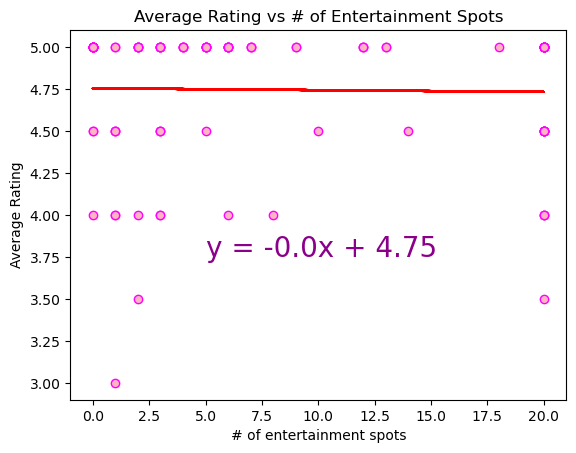

In [15]:
x = entertainment_data_df['# of entertainment spots'].astype("float")
y = entertainment_data_df['Average Rating'].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, marker = "o", facecolors ="lightpink", edgecolors="magenta")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (5,3.75), fontsize=20, color="darkmagenta")


plt.title("Average Rating vs # of Entertainment Spots")
plt.xlabel('# of entertainment spots')
plt.ylabel('Average Rating')


print(f"the r value is: {rvalue**2}")


plt.show()

In [16]:
spa_data_df = entertainment_data_df

spa_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7
...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20


In [17]:
spa_data_df["# of spa spots"] = ""

spa_data_df

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\3516832039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spa_data_df["# of spa spots"] = ""


,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,
...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,


In [18]:
import requests
import pandas as pd

# Define your DataFrame (assuming you have one)
spa_data_df

# Initialize an empty list to store results
spa_counts = []

# Set base URL for Geoapify API
base_url = "https://api.geoapify.com/v2/places"

# Iterate through the DataFrame
for index, row in spa_data_df.iterrows():
    # Get latitude and longitude from the DataFrame
    latitude = row["Latitude"]
    longitude = row["Longitude"]

    # Set up parameters for the API request
    limit = 20
    radius = 10000
    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params = {
        "filter": filters,
        "limit": limit,
        "bias": bias,
        "apiKey": geoapify_key,  
        "categories": "leisure.spa"
    }

    # Make the API request
    spa_response = requests.get(base_url, params=params)

    # Check if the response status code is successful (e.g., 200)
    if spa_response.status_code == 200:
        spa_data = spa_response.json()
        
        # Extract the relevant information from the JSON response
        try:
            count = len(spa_data["features"])
        except KeyError:
            count = 0  # If no entertainment spots found
        
        # Append the result to the list
        spa_counts.append(count)
        
        # Log the search results
        print(f"Location: {latitude}, {longitude} - Spa spots: {count}")
    else:
        print(f"Failed to fetch data for location: {latitude}, {longitude}")

# Add the list of counts to the DataFrame
spa_data_df["# of spa spots"] = spa_counts

# Display sample data with counts
print(spa_data_df)


Location: 50.32235, -119.16497 - Spa spots: 0
Location: 49.23602, -122.96054 - Spa spots: 0
Location: 49.113632, -125.88786 - Spa spots: 0
Location: 54.178745, -130.17975 - Spa spots: 0
Location: 48.60293, -123.41113 - Spa spots: 0
Location: 48.42096, -123.36286 - Spa spots: 0
Location: 49.79765, -119.70941 - Spa spots: 0
Location: 49.544155, -124.86569 - Spa spots: 0
Location: 53.47473, -127.272125 - Spa spots: 0
Location: 53.13768, -126.65463 - Spa spots: 0
Location: 49.5234, -123.94494 - Spa spots: 0
Location: 49.454025, -123.73458 - Spa spots: 0
Location: 48.52018, -123.54333 - Spa spots: 0
Location: 49.932636, -124.684654 - Spa spots: 0
Location: 49.286385, -115.26597 - Spa spots: 0
Location: 49.461456, -123.73764 - Spa spots: 0
Location: 48.808514, -123.49709 - Spa spots: 0
Location: 48.63424, -123.40712 - Spa spots: 0
Location: 53.102455, -121.56773 - Spa spots: 0
Location: 49.29047, -123.053314 - Spa spots: 2
Location: 50.87774, -119.91015 - Spa spots: 0
Location: 49.5234, -123

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\3050746140.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spa_data_df["# of spa spots"] = spa_counts


In [19]:
spa_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0
...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2


the r value is: 0.06955647496124177


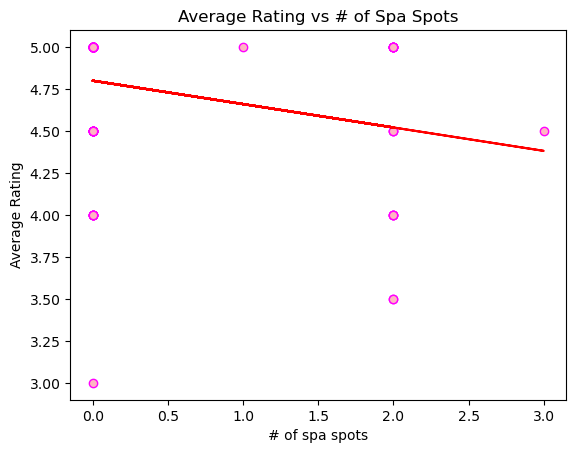

In [20]:
x = entertainment_data_df['# of spa spots'].astype("float")
y = entertainment_data_df['Average Rating'].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, marker = "o", facecolors ="lightpink", edgecolors="magenta")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (5,3.75), fontsize=20, color="darkmagenta")


plt.title("Average Rating vs # of Spa Spots")
plt.xlabel('# of spa spots')
plt.ylabel('Average Rating')


print(f"the r value is: {rvalue**2}")


plt.show()

In [21]:
tourism_data_df = spa_data_df

tourism_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0
...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2


In [22]:
tourism_data_df["# of tourism spots"] = ""

tourism_data_df

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\4103201125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourism_data_df["# of tourism spots"] = ""


,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,
...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,


In [23]:
import requests
import pandas as pd

# Define your DataFrame (assuming you have one)
tourism_data_df

# Initialize an empty list to store results
tourism_counts = []

# Set base URL for Geoapify API
base_url = "https://api.geoapify.com/v2/places"

# Iterate through the DataFrame
for index, row in tourism_data_df.iterrows():
    # Get latitude and longitude from the DataFrame
    latitude = row["Latitude"]
    longitude = row["Longitude"]

    # Set up parameters for the API request
    limit = 40
    radius = 10000
    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params = {
        "filter": filters,
        "limit": limit,
        "bias": bias,
        "apiKey": geoapify_key,  
        "categories": "tourism"
    }

    # Make the API request
    tourism_response = requests.get(base_url, params=params)

    # Check if the response status code is successful (e.g., 200)
    if tourism_response.status_code == 200:
        tourism_data = tourism_response.json()
        
        # Extract the relevant information from the JSON response
        try:
            count = len(tourism_data["features"])
        except KeyError:
            count = 0  # If no entertainment spots found
        
        # Append the result to the list
        tourism_counts.append(count)
        
        # Log the search results
        print(f"Location: {latitude}, {longitude} - Tourism spots: {count}")
    else:
        print(f"Failed to fetch data for location: {latitude}, {longitude}")

# Add the list of counts to the DataFrame
tourism_data_df["# of tourism spots"] = tourism_counts

# Display sample data with counts
print(tourism_data_df)


Location: 50.32235, -119.16497 - Tourism spots: 9
Location: 49.23602, -122.96054 - Tourism spots: 40
Location: 49.113632, -125.88786 - Tourism spots: 25
Location: 54.178745, -130.17975 - Tourism spots: 3
Location: 48.60293, -123.41113 - Tourism spots: 40
Location: 48.42096, -123.36286 - Tourism spots: 40
Location: 49.79765, -119.70941 - Tourism spots: 40
Location: 49.544155, -124.86569 - Tourism spots: 4
Location: 53.47473, -127.272125 - Tourism spots: 0
Location: 53.13768, -126.65463 - Tourism spots: 0
Location: 49.5234, -123.94494 - Tourism spots: 11
Location: 49.454025, -123.73458 - Tourism spots: 9
Location: 48.52018, -123.54333 - Tourism spots: 40
Location: 49.932636, -124.684654 - Tourism spots: 8
Location: 49.286385, -115.26597 - Tourism spots: 0
Location: 49.461456, -123.73764 - Tourism spots: 9
Location: 48.808514, -123.49709 - Tourism spots: 40
Location: 48.63424, -123.40712 - Tourism spots: 40
Location: 53.102455, -121.56773 - Tourism spots: 8
Location: 49.29047, -123.053314

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\128397382.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourism_data_df["# of tourism spots"] = tourism_counts


In [24]:
tourism_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40
...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40


the r value is: 0.002150466370403442


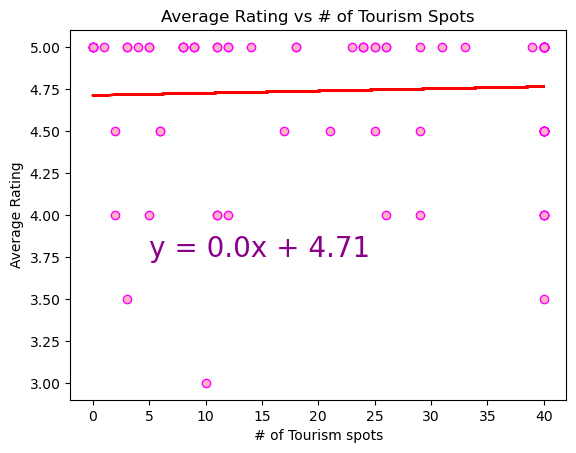

In [25]:
x = entertainment_data_df['# of tourism spots'].astype("float")
y = entertainment_data_df['Average Rating'].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, marker = "o", facecolors ="lightpink", edgecolors="magenta")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (5,3.75), fontsize=20, color="darkmagenta")


plt.title("Average Rating vs # of Tourism Spots")
plt.xlabel('# of Tourism spots')
plt.ylabel('Average Rating')


print(f"the r value is: {rvalue**2}")


plt.show()

In [26]:
water_data_df = tourism_data_df

water_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40
...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40


In [27]:
water_data_df["# of water spots"] = ""

water_data_df

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\2246851179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_data_df["# of water spots"] = ""


,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots,# of water spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9,
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40,
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25,
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3,
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40,
...,...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40,
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40,
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3,
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40,


In [37]:


# Define your DataFrame (assuming you have one)
water_data_df

# Initialize an empty list to store results
water_counts = []

# Set base URL for Geoapify API
base_url = "https://api.geoapify.com/v2/places"

# Iterate through the DataFrame
for index, row in water_data_df.iterrows():
    # Get latitude and longitude from the DataFrame
    latitude = row["Latitude"]
    longitude = row["Longitude"]

    # Set up parameters for the API request
    limit = 20
    radius = 3000
    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params = {
        "filter": filters,
        "limit": limit,
        "bias": bias,
        "apiKey": geoapify_key,  
        "categories": "natural.water"
    }

    # Make the API request
    water_response = requests.get(base_url, params=params)

    # Check if the response status code is successful (e.g., 200)
    if water_response.status_code == 200:
        water_data = water_response.json()
        
        # Extract the relevant information from the JSON response
        try:
            count = len(water_data["features"])
        except KeyError:
            count = 0  # If no entertainment spots found
        
        # Append the result to the list
        water_counts.append(count)
        
        # Log the search results
        print(f"Location: {latitude}, {longitude} - water spots: {count}")
    else:
        print(f"Failed to fetch data for location: {latitude}, {longitude}")

# Add the list of counts to the DataFrame
water_data_df["# of water spots"] = water_counts

# Display sample data with counts
print(water_data_df)


Location: 50.32235, -119.16497 - water spots: 4
Location: 49.23602, -122.96054 - water spots: 17
Location: 49.113632, -125.88786 - water spots: 0
Location: 54.178745, -130.17975 - water spots: 8
Location: 48.60293, -123.41113 - water spots: 20
Location: 48.42096, -123.36286 - water spots: 20
Location: 49.79765, -119.70941 - water spots: 4
Location: 49.544155, -124.86569 - water spots: 2
Location: 53.47473, -127.272125 - water spots: 1
Location: 53.13768, -126.65463 - water spots: 0
Location: 49.5234, -123.94494 - water spots: 2
Location: 49.454025, -123.73458 - water spots: 4
Location: 48.52018, -123.54333 - water spots: 8
Location: 49.932636, -124.684654 - water spots: 0
Location: 49.286385, -115.26597 - water spots: 9
Location: 49.461456, -123.73764 - water spots: 3
Location: 48.808514, -123.49709 - water spots: 13
Location: 48.63424, -123.40712 - water spots: 14
Location: 53.102455, -121.56773 - water spots: 13
Location: 49.29047, -123.053314 - water spots: 14
Location: 50.87774, -1

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\2691566989.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_data_df["# of water spots"] = water_counts


In [38]:
water_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots,# of water spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9,4
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40,17
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25,0
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3,8
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40,20
...,...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40,10
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40,20
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3,5
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40,20


the r value is: 0.00025284312259425744


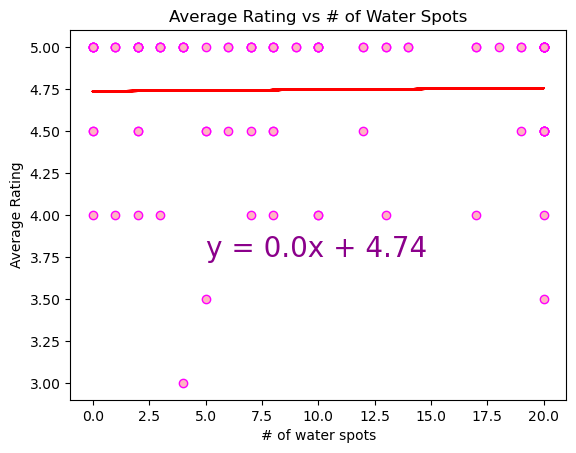

In [39]:
x = entertainment_data_df['# of water spots'].astype("float")
y = entertainment_data_df['Average Rating'].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, marker = "o", facecolors ="lightpink", edgecolors="magenta")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (5,3.75), fontsize=20, color="darkmagenta")


plt.title("Average Rating vs # of Water Spots")
plt.xlabel('# of water spots')
plt.ylabel('Average Rating')


print(f"the r value is: {rvalue**2}")


plt.show()

In [40]:
transit_data_df = water_data_df

transit_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots,# of water spots
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9,4
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40,17
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25,0
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3,8
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40,20
...,...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40,10
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40,20
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3,5
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40,20


In [46]:
transit_data_df["# of subway entrances"] = ""

transit_data_df

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\4199234108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transit_data_df["# of subway entrances"] = ""


,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots,# of water spots,# of public transit,# of subway entrances
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9,4,0,
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40,17,6,
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25,0,0,
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3,8,0,
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40,20,0,
...,...,...,...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40,10,0,
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40,20,26,
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3,5,0,
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40,20,26,


In [47]:
# Define your DataFrame (assuming you have one)
transit_data_df

# Initialize an empty list to store results
transit_counts = []

# Set base URL for Geoapify API
base_url = "https://api.geoapify.com/v2/places"

# Iterate through the DataFrame
for index, row in transit_data_df.iterrows():
    # Get latitude and longitude from the DataFrame
    latitude = row["Latitude"]
    longitude = row["Longitude"]

    # Set up parameters for the API request
    limit = 30
    radius = 5000
    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params = {
        "filter": filters,
        "limit": limit,
        "bias": bias,
        "apiKey": geoapify_key,  
        "categories": "public_transport.subway.entrance"
    }

    # Make the API request
    transit_response = requests.get(base_url, params=params)

    # Check if the response status code is successful (e.g., 200)
    if transit_response.status_code == 200:
        transit_data = transit_response.json()
        # Extract the relevant information from the JSON response
        try:
            count= len(transit_data["features"])
        except KeyError:
            count = 0  # If no entertainment spots found
        
        # Append the result to the list
        transit_counts.append(count)
        
        # Log the search results

        print(f"Location: {latitude}, {longitude} - transit spots: {count}")
    else:
        print(f"Failed to fetch data for location: {latitude}, {longitude}")

# Add the list of counts to the DataFrame


transit_data_df["# of subway entrances"] = transit_counts

# Display sample data with counts

print(transit_data_df)


Location: 50.32235, -119.16497 - transit spots: 0
Location: 49.23602, -122.96054 - transit spots: 22
Location: 49.113632, -125.88786 - transit spots: 0
Location: 54.178745, -130.17975 - transit spots: 0
Location: 48.60293, -123.41113 - transit spots: 0
Location: 48.42096, -123.36286 - transit spots: 0
Location: 49.79765, -119.70941 - transit spots: 0
Location: 49.544155, -124.86569 - transit spots: 0
Location: 53.47473, -127.272125 - transit spots: 0
Location: 53.13768, -126.65463 - transit spots: 0
Location: 49.5234, -123.94494 - transit spots: 0
Location: 49.454025, -123.73458 - transit spots: 0
Location: 48.52018, -123.54333 - transit spots: 0
Location: 49.932636, -124.684654 - transit spots: 0
Location: 49.286385, -115.26597 - transit spots: 0
Location: 49.461456, -123.73764 - transit spots: 0
Location: 48.808514, -123.49709 - transit spots: 0
Location: 48.63424, -123.40712 - transit spots: 0
Location: 53.102455, -121.56773 - transit spots: 0
Location: 49.29047, -123.053314 - trans

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\293382961.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transit_data_df["# of subway entrances"] = transit_counts


the r value is: 0.022224642878110608


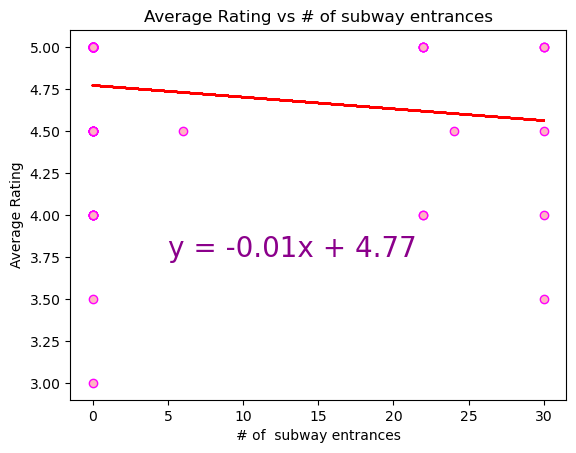

In [49]:
x = entertainment_data_df["# of subway entrances"].astype("float")
y = entertainment_data_df['Average Rating'].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, marker = "o", facecolors ="lightpink", edgecolors="magenta")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (5,3.75), fontsize=20, color="darkmagenta")


plt.title("Average Rating vs # of subway entrances")
plt.xlabel('# of  subway entrances')
plt.ylabel('Average Rating')


print(f"the r value is: {rvalue**2}")


plt.show()

In [50]:
activity_data_df = transit_data_df

activity_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots,# of water spots,# of public transit,# of subway entrances
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9,4,0,0
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40,17,6,22
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25,0,0,0
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3,8,0,0
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40,10,0,22
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40,20,26,30
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3,5,0,0
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40,20,26,30


In [51]:
transit_data_df["# of activity centres"] = ""

transit_data_df

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\3025473773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transit_data_df["# of activity centres"] = ""


,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots,# of water spots,# of public transit,# of subway entrances,# of activity centres
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9,4,0,0,
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40,17,6,22,
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25,0,0,0,
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3,8,0,0,
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40,20,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40,10,0,22,
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40,20,26,30,
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3,5,0,0,
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40,20,26,30,


In [54]:
# Define your DataFrame 
activity_data_df

# Initialize an empty list to store results
activity_counts = []

# Set base URL for Geoapify API
base_url = "https://api.geoapify.com/v2/places"

# Iterate through the DataFrame
for index, row in activity_data_df.iterrows():
    # Get latitude and longitude from the DataFrame
    latitude = row["Latitude"]
    longitude = row["Longitude"]

    # Set up parameters for the API request
    limit = 30
    radius = 10000
    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params = {
        "filter": filters,
        "limit": limit,
        "bias": bias,
        "apiKey": geoapify_key,  
        "categories": "activity"
    }

    # Make the API request
    activity_response = requests.get(base_url, params=params)

    # Check if the response status code is successful (e.g., 200)
    if activity_response.status_code == 200:
        activity_data = activity_response.json()
        # Extract the relevant information from the JSON response
        try:
            count= len(activity_data["features"])
        except KeyError:
            count = 0  # If no entertainment spots found
        
        # Append the result to the list
        activity_counts.append(count)
        
        # Log the search results

        print(f"Location: {latitude}, {longitude} - activity spots: {count}")
    else:
        print(f"Failed to fetch data for location: {latitude}, {longitude}")

# Add the list of counts to the DataFrame


activity_data_df["# of activity centres"] = activity_counts

# Display sample data with counts

print(activity_data_df)


Location: 50.32235, -119.16497 - activity spots: 0
Location: 49.23602, -122.96054 - activity spots: 30
Location: 49.113632, -125.88786 - activity spots: 1
Location: 54.178745, -130.17975 - activity spots: 0
Location: 48.60293, -123.41113 - activity spots: 7
Location: 48.42096, -123.36286 - activity spots: 19
Location: 49.79765, -119.70941 - activity spots: 4
Location: 49.544155, -124.86569 - activity spots: 3
Location: 53.47473, -127.272125 - activity spots: 0
Location: 53.13768, -126.65463 - activity spots: 0
Location: 49.5234, -123.94494 - activity spots: 0
Location: 49.454025, -123.73458 - activity spots: 2
Location: 48.52018, -123.54333 - activity spots: 6
Location: 49.932636, -124.684654 - activity spots: 1
Location: 49.286385, -115.26597 - activity spots: 2
Location: 49.461456, -123.73764 - activity spots: 2
Location: 48.808514, -123.49709 - activity spots: 3
Location: 48.63424, -123.40712 - activity spots: 6
Location: 53.102455, -121.56773 - activity spots: 1
Location: 49.29047,

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\2030231444.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_data_df["# of activity centres"] = activity_counts


In [55]:
activity_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots,# of water spots,# of public transit,# of subway entrances,# of activity centres
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9,4,0,0,0
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40,17,6,22,30
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25,0,0,0,1
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3,8,0,0,0
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40,20,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40,10,0,22,30
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40,20,26,30,30
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3,5,0,0,1
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40,20,26,30,30


the r value is: 0.00823075585072367


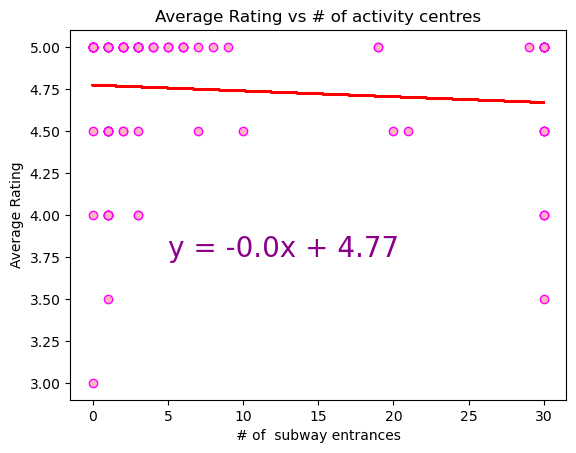

In [56]:
x = entertainment_data_df["# of activity centres"].astype("float")
y = entertainment_data_df['Average Rating'].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, marker = "o", facecolors ="lightpink", edgecolors="magenta")



plt.plot(x,regress_values,"r-")

plt.annotate(line_eq, (5,3.75), fontsize=20, color="darkmagenta")


plt.title("Average Rating vs # of activity centres")
plt.xlabel('# of  subway entrances')
plt.ylabel('Average Rating')


print(f"the r value is: {rvalue**2}")


plt.show()

In [60]:
restaurant_data_df = activity_data_df

restaurant_data_df

,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots,# of water spots,# of public transit,# of subway entrances,# of activity centres,# of grocery stores
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9,4,0,0,0,0
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40,17,6,22,30,0
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25,0,0,0,1,0
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3,8,0,0,0,0
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40,20,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40,10,0,22,30,0
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40,20,26,30,30,0
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3,5,0,0,1,0
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40,20,26,30,30,0


In [61]:
restaurant_data_df["# of restaurants"] = ""

restaurant_data_df

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\4128460755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_data_df["# of restaurants"] = ""


,Name,Review Count,Average Rating,Latitude,Longitude,# of entertainment spots,# of spa spots,# of tourism spots,# of water spots,# of public transit,# of subway entrances,# of activity centres,# of grocery stores,# of restaurants
0,The Gate House Cottage at Castle on the Mountain,3,5.0,50.322350,-119.164970,7,0,9,4,0,0,0,0,
1,AWARD-WINNING LUXURY HERITAGE RESIDENCE NEAR D...,20,5.0,49.236020,-122.960540,20,0,40,17,6,22,30,0,
2,Cedar Shack Cottage with private Hot Tub - Ste...,58,5.0,49.113632,-125.887860,3,0,25,0,0,0,1,0,
3,Cassiar Cannery ~ where history and nature meet~,56,5.0,54.178745,-130.179750,0,0,3,8,0,0,0,0,
4,2 bedroom suite located between Victoria & Sidney,19,5.0,48.602930,-123.411130,7,0,40,20,0,0,7,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Beautiful 2 Bedroom Condo in North Vancouver,5,4.0,49.313420,-123.082430,20,2,40,10,0,22,30,0,
94,ULTRALUXURY FURNISHED SUITE,6,4.0,49.285140,-123.118110,20,2,40,20,26,30,30,0,
95,Quails Trail B&B,3,3.5,50.054382,-119.415480,2,2,3,5,0,0,1,0,
96,Droplet Teardrop Trailer,2,3.5,49.284954,-123.112060,20,2,40,20,26,30,30,0,


In [64]:
# Define your DataFrame 
restaurant_data_df

# Initialize an empty list to store results
restaurant_counts = []

# Set base URL for Geoapify API
base_url = "https://api.geoapify.com/v2/places"

# Iterate through the DataFrame
for index, row in restaurant_data_df.iterrows():
    # Get latitude and longitude from the DataFrame
    latitude = row["Latitude"]
    longitude = row["Longitude"]

    # Set up parameters for the API request
    limit = 30
    radius = 50000
    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params = {
        "filter": filters,
        "limit": limit,
        "bias": bias,
        "apiKey": geoapify_key,  
        "categories": "catering"
    }

    # Make the API request
    restaurant_response = requests.get(base_url, params=params)

    # Check if the response status code is successful (e.g., 200)
    if restaurant_response.status_code == 200:
        restaurant_data = activity_response.json()
        # Extract the relevant information from the JSON response
        try:
            count= len(restaurant_data["features"])
        except KeyError:
            count = 0  # If no entertainment spots found
        
        # Append the result to the list
        restaurant_counts.append(count)
        
        # Log the search results

        print(f"Location: {latitude}, {longitude} - restaurants spots: {count}")
    else:
        print(f"Failed to fetch data for location: {latitude}, {longitude}")

# Add the list of counts to the DataFrame


restaurant_data_df["# of restaurants"] = restaurant_counts

# Display sample data with counts

print(restaurant_data_df)


Location: 50.32235, -119.16497 - restaurants spots: 0
Location: 49.23602, -122.96054 - restaurants spots: 0
Location: 49.113632, -125.88786 - restaurants spots: 0
Location: 54.178745, -130.17975 - restaurants spots: 0
Location: 48.60293, -123.41113 - restaurants spots: 0
Location: 48.42096, -123.36286 - restaurants spots: 0
Location: 49.79765, -119.70941 - restaurants spots: 0
Location: 49.544155, -124.86569 - restaurants spots: 0
Location: 53.47473, -127.272125 - restaurants spots: 0
Location: 53.13768, -126.65463 - restaurants spots: 0
Location: 49.5234, -123.94494 - restaurants spots: 0
Location: 49.454025, -123.73458 - restaurants spots: 0
Location: 48.52018, -123.54333 - restaurants spots: 0
Location: 49.932636, -124.684654 - restaurants spots: 0
Location: 49.286385, -115.26597 - restaurants spots: 0
Location: 49.461456, -123.73764 - restaurants spots: 0
Location: 48.808514, -123.49709 - restaurants spots: 0
Location: 48.63424, -123.40712 - restaurants spots: 0
Location: 53.102455

C:\Users\annab\AppData\Local\Temp\ipykernel_8276\315187656.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_data_df["# of restaurants"] = restaurant_counts
